<a href="https://colab.research.google.com/github/hemil19/Janatahack-Healthcare-Analytics-II/blob/master/Janatahack_healthcare_analytics_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')

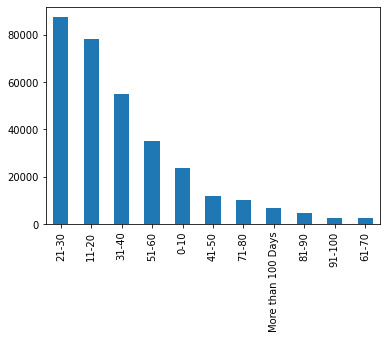

In [3]:
train['Stay'].value_counts().plot(kind='bar')

In [4]:
train.shape,test.shape

((318438, 18), (137057, 17))

In [5]:
combine=train.append(test)
combine.reset_index(inplace=True)
combine.drop('index',axis=1,inplace=True)
combine.shape

(455495, 18)

In [6]:
combine.isnull().sum()

case_id                                   0
Hospital_code                             0
Hospital_type_code                        0
City_Code_Hospital                        0
Hospital_region_code                      0
Available Extra Rooms in Hospital         0
Department                                0
Ward_Type                                 0
Ward_Facility_Code                        0
Bed Grade                               148
patientid                                 0
City_Code_Patient                      6689
Type of Admission                         0
Severity of Illness                       0
Visitors with Patient                     0
Age                                       0
Admission_Deposit                         0
Stay                                 137057
dtype: int64

In [7]:
combine.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [8]:
combine.isnull().sum()

case_id                                   0
Hospital_code                             0
Hospital_type_code                        0
City_Code_Hospital                        0
Hospital_region_code                      0
Available Extra Rooms in Hospital         0
Department                                0
Ward_Type                                 0
Ward_Facility_Code                        0
Bed Grade                               148
patientid                                 0
City_Code_Patient                      6689
Type of Admission                         0
Severity of Illness                       0
Visitors with Patient                     0
Age                                       0
Admission_Deposit                         0
Stay                                 137057
dtype: int64

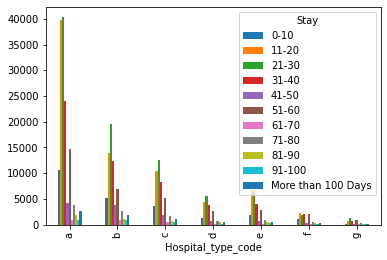

In [9]:
pd.crosstab(combine['Hospital_type_code'],combine['Stay']).plot(kind='bar')

In [10]:
hospital_type_map={'a':7,'b':6,'c':5,'d':4,'e':3,'f':2,'g':1}
combine['Hospital_type_code']=combine['Hospital_type_code'].map(hospital_type_map)

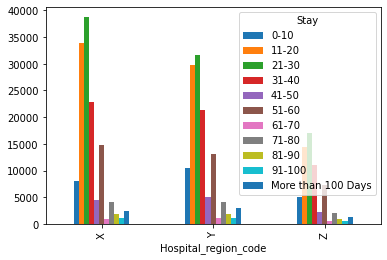

In [11]:
pd.crosstab(combine['Hospital_region_code'],combine['Stay']).plot(kind='bar')

In [12]:
hospital_region_map={'X':3,'Y':2,'Z':1}
combine['Hospital_region_code']=combine['Hospital_region_code'].map(hospital_region_map)

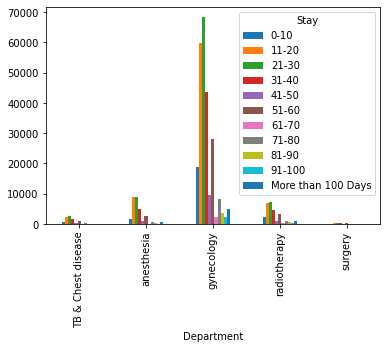

In [13]:
pd.crosstab(combine['Department'],combine['Stay']).plot(kind='bar')

In [14]:
np.unique(combine['Department'])

array(['TB & Chest disease', 'anesthesia', 'gynecology', 'radiotherapy',
       'surgery'], dtype=object)

In [15]:
department_map={'TB & Chest disease':1, 'anesthesia':3, 'gynecology':5, 'radiotherapy':2,
       'surgery':0}
combine['Department']=combine['Department'].map(department_map)

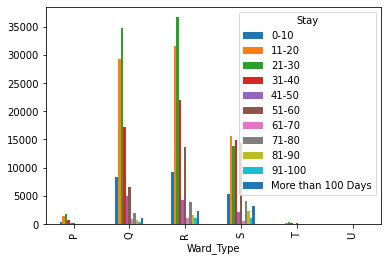

In [16]:
pd.crosstab(combine['Ward_Type'],combine['Stay']).plot(kind='bar')

In [17]:
ward_type_map={'Q':6,'R':5,'S':4,'P':3,'T':2,'U':1}
combine['Ward_Type']=combine['Ward_Type'].map(ward_type_map)

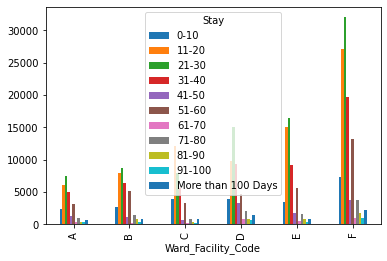

In [18]:
pd.crosstab(combine['Ward_Facility_Code'],combine['Stay']).plot(kind='bar')

In [19]:
ward_facility_map={'A':2,'B':2,'C':4,'D':5,'E':5,'F':6}
combine['Ward_Facility_Code']=combine['Ward_Facility_Code'].map(ward_facility_map)

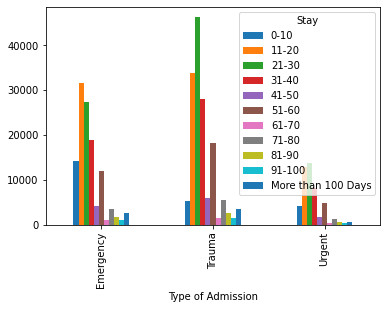

In [20]:
pd.crosstab(combine['Type of Admission'],combine['Stay']).plot(kind='bar')

In [21]:
admission_type_map={'Emergency':3,'Trauma':2,'Urgent':1}
combine['Type of Admission']=combine['Type of Admission'].map(admission_type_map)

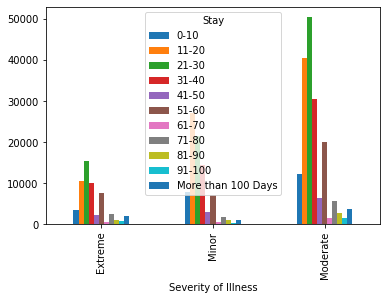

In [22]:
pd.crosstab(combine['Severity of Illness'],combine['Stay']).plot(kind='bar')

In [23]:
severity_map={'Extreme':1,'Minor':2,'Moderate':3}
combine['Severity of Illness']=combine['Severity of Illness'].map(severity_map)

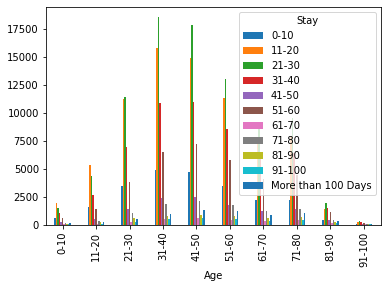

In [24]:
pd.crosstab(combine['Age'],combine['Stay']).plot(kind='bar')

In [25]:
np.unique(combine['Age'])

array(['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70',
       '71-80', '81-90', '91-100'], dtype=object)

In [26]:
age_map={'0-10':0, '11-20':1, '21-30':2, '31-40':3, '41-50':4, '51-60':5, '61-70':6,
       '71-80':7, '81-90':8, '91-100':9}
combine['Age']=combine['Age'].map(age_map)

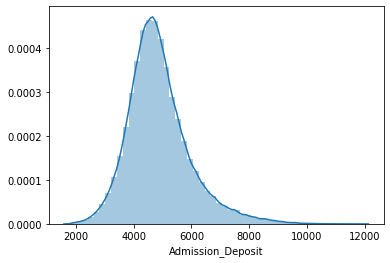

In [27]:
import seaborn as sns
sns.distplot(combine['Admission_Deposit'])

In [28]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
combine['Admission_Deposit']=sc.fit_transform(np.array(combine['Admission_Deposit']).reshape(-1,1))

In [29]:
combine.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,5,3,1,3,2,5,6,2.0,31397,7.0,3,1,2,5,0.030937,0-10
1,2,2,5,5,1,2,2,4,6,2.0,31397,7.0,2,1,2,5,0.992244,41-50
2,3,10,3,1,3,2,3,4,5,2.0,31397,7.0,2,1,2,5,-0.122061,31-40
3,4,26,6,2,2,2,2,5,5,2.0,31397,7.0,2,1,2,5,2.207012,41-50
4,5,26,6,2,2,2,2,4,5,2.0,31397,7.0,2,1,2,5,0.627261,41-50


In [31]:
combine['Bed Grade'].fillna(combine['Bed Grade'].median(),inplace=True)
combine['City_Code_Patient'].fillna(combine['City_Code_Patient'].median(),inplace=True)

In [32]:
combine.isnull().sum()

case_id                                   0
Hospital_code                             0
Hospital_type_code                        0
City_Code_Hospital                        0
Hospital_region_code                      0
Available Extra Rooms in Hospital         0
Department                                0
Ward_Type                                 0
Ward_Facility_Code                        0
Bed Grade                                 0
patientid                                 0
City_Code_Patient                         0
Type of Admission                         0
Severity of Illness                       0
Visitors with Patient                     0
Age                                       0
Admission_Deposit                         0
Stay                                 137057
dtype: int64

In [33]:
X = combine[combine['Stay'].isnull()!=True].drop(['Stay','case_id','patientid'], axis=1)
y = combine[combine['Stay'].isnull()!=True]['Stay']

test = combine[combine['Stay'].isnull()==True].drop(['Stay','case_id','patientid'], axis=1)

X.shape, y.shape, test.shape

((318438, 15), (318438,), (137057, 15))

In [34]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [35]:
stay=pd.DataFrame(y)
stay.columns=['stay']
stay.head()

,stay
0,0
1,4
2,3
3,4
4,4


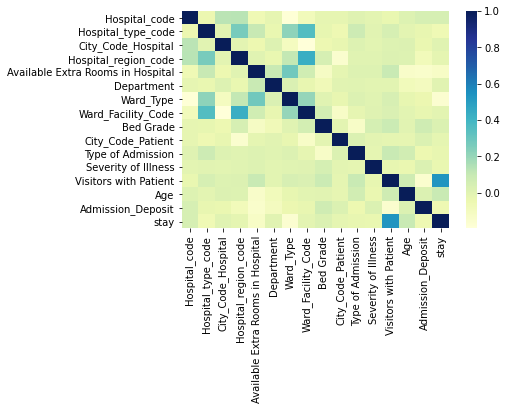

In [36]:
import seaborn as sns
corr=pd.concat([X,stay],axis=1).corr()
sns.heatmap(corr,cmap='YlGnBu')

In [37]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [39]:
X_train.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
231676,19,7,7,2,4,5,6,4,2.0,8.0,3,3,4,4,1.262295
166821,19,7,7,2,2,2,4,4,1.0,2.0,3,3,6,6,2.877992
70566,26,6,2,2,2,2,5,5,3.0,7.0,3,1,3,2,0.100984
197982,26,6,2,2,2,5,6,5,3.0,14.0,2,3,3,6,2.149868
280389,18,4,13,2,4,2,5,2,2.0,8.0,1,3,2,4,-1.566326


In [40]:
from lightgbm import LGBMClassifier
clf=LGBMClassifier().fit(X_train,y_train)
accuracy_score(clf.predict(X_test),y_test)*100 #42.36

42.41144328601935

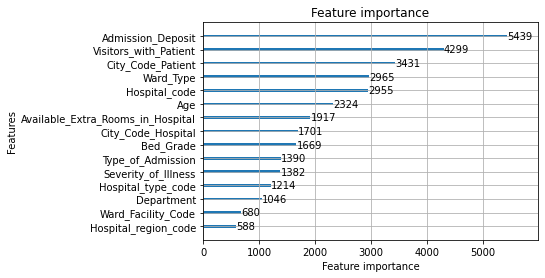

In [41]:
import lightgbm
lightgbm.plot_importance(clf)

In [42]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(clf.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.15      0.40      0.21      1719
           1       0.51      0.43      0.46     18756
           2       0.66      0.43      0.52     27065
           3       0.22      0.42      0.29      5809
           4       0.00      0.20      0.00         5
           5       0.50      0.41      0.45      8732
           6       0.00      0.00      0.00         1
           7       0.01      0.36      0.03        74
           8       0.17      0.34      0.23       464
           9       0.03      0.39      0.05        36
          10       0.41      0.52      0.46      1027

    accuracy                           0.42     63688
   macro avg       0.24      0.35      0.25     63688
weighted avg       0.53      0.42      0.46     63688



In [43]:
submission=pd.DataFrame()
submission['case_id']=pd.read_csv('/content/test.csv')['case_id']
submission['Stay']=le.inverse_transform(clf.predict(test))

In [44]:
submission.head()

,case_id,Stay
0,318439,0-10
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,51-60


In [45]:
submission.to_csv('final.csv',index=False)#42.5577